In [2]:
from logging import log
from matplotlib.cbook import ls_mapper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [3]:
# Load data
colnames = ['T','N','p']
data = pd.read_csv('linear.csv',names=colnames, index_col=False, sep=",")

runtimes = data["T"].tolist()
size = data["N"].tolist()
threads = data['p'].tolist()

#move runtime to third column
data = data[['N','p','T']]

print(data)

      N   p         T
0    64   1  0.039446
1    64   2  0.031988
2    64   3  0.030374
3    64   4  0.036938
4    64   5  0.032005
..  ...  ..       ...
67  256  20  1.310660
68  256  21  1.515260
69  256  22  1.535800
70  256  23  1.554360
71  256  24  1.657070

[72 rows x 3 columns]


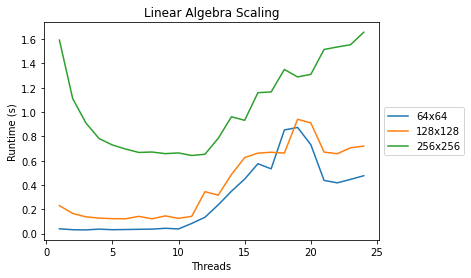

In [9]:
#Plot Linear Algebra scaling
d64 = data.query('N == 64')
d128 = data.query('N == 128')
d256 = data.query('N == 256')

p = d64['p'].to_numpy()
plt.title('Linear Algebra Scaling')
plt.plot(p, d64['T'].to_numpy(), label='64x64')
plt.plot(p, d128['T'].to_numpy(), label='128x128')
plt.plot(p, d256['T'].to_numpy(), label='256x256')
plt.xlabel('Threads')
plt.ylabel('Runtime (s)')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('linear.png')

In [5]:
# Load Full data
colnames = ['T','N','p']
data2 = pd.read_csv('runtime.csv',names=colnames, index_col=False, sep=",")

runtimes = data2["T"].tolist()
size = data2["N"].tolist()
threads = data2['p'].tolist()

#move runtime to third column
data2 = data2[['N','p','T']]

print(data2)

        N   p          T
0      64   1   0.040456
1      64   2   0.032694
2      64   3   0.024661
3      64   4   0.025744
4      64   5   0.024146
..    ...  ..        ...
115  1024  20  28.155300
116  1024  21  42.197200
117  1024  22  43.136500
118  1024  23  44.344200
119  1024  24  44.684900

[120 rows x 3 columns]


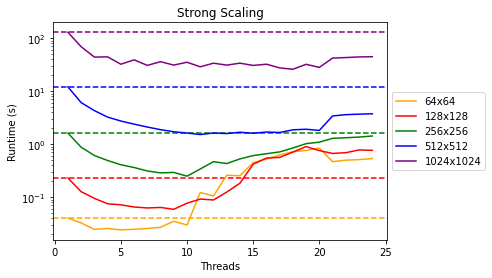

In [8]:
#Strong Scaling
D64 = data2.query('N == 64')
D128 = data2.query('N == 128')
D256 = data2.query('N == 256')
D512 = data2.query('N == 512')
D1024 = data2.query('N == 1024')

colors = ["orange","red","green","blue",'purple']

p = D64['p'].to_numpy()
plt.title('Strong Scaling')

plt.axhline(y=D64['T'].to_numpy()[0], linestyle='--', c=colors[0])
plt.axhline(y=D128['T'].to_numpy()[0], linestyle='--', c=colors[1])
plt.axhline(y=D256['T'].to_numpy()[0], linestyle='--', c=colors[2])
plt.axhline(y=D512['T'].to_numpy()[0], linestyle='--', c=colors[3])
plt.axhline(y=D1024['T'].to_numpy()[0], linestyle='--', c=colors[4])

plt.plot(p, D64['T'].to_numpy(), c=colors[0], label='64x64')
plt.plot(p, D128['T'].to_numpy(), c=colors[1], label='128x128')
plt.plot(p, D256['T'].to_numpy(), c=colors[2], label='256x256')
plt.plot(p, D512['T'].to_numpy(), c=colors[3], label='512x512')
plt.plot(p, D1024['T'].to_numpy(), c=colors[4], label='1024x1024')

plt.yscale('log')
plt.xlabel('Threads')
plt.ylabel('Runtime (s)')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('strong.png')

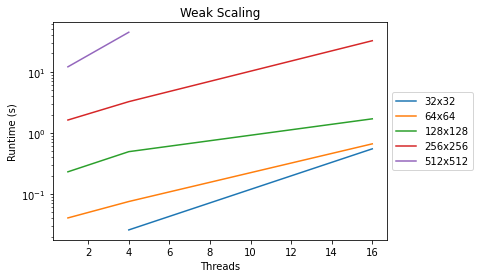

In [7]:
#Weak Scaling
data2['w'] = data2['N'] / np.sqrt(data2['p'])
w32 = data2.query('w == 32')
w64 = data2.query('w == 64')
w128 = data2.query('w == 128')
w256 = data2.query('w == 256')
w512 = data2.query('w == 512')

p = w64['p'].to_numpy()
plt.title('Weak Scaling')
plt.plot(p[1:], w32['T'].to_numpy(), label='32x32')
plt.plot(p, w64['T'].to_numpy(), label='64x64')
plt.plot(p, w128['T'].to_numpy(), label='128x128')
plt.plot(p, w256['T'].to_numpy(), label='256x256')
plt.plot(p[:2], w512['T'].to_numpy(), label='512x512')
plt.yscale('log')
plt.xlabel('Threads')
plt.ylabel('Runtime (s)')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('weak.png')